<a href="https://colab.research.google.com/github/FedeleDelvecchio/MLPNS/blob/main/Class/Lez8e9_3103e01042021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vediamo come mettiamo un file da colab a GitHub**

Prima di fare "ok" nella casella che compare facendo "file-->salva su github", se cambiamo il nome e scriviamo il percorso dove mettere il file, lo inserisce in quella cartella. E se la cartella non esiste, la crea.

Abbiamo parlato di 2 categorie di ML:

- **SUPERVISE LEARNING**: PRETEND THAT FOR SOME OF THE DATA I DONT KNOW THE RESULT AND PREDICT THE RESULT. I HAVE A GROUND TRUTH AND 
I AM ABLE TO COMPARE MY RESULTH WITH GROUND TRUTH, ABLE TO DETERMINE THE ACCURACY FOR EXAMPLE. I ABLE TO TUNE HYPERPARAMETERS.

There exist the **hyperparaeters**: they are parameters those are the choice that I made for the model that are not optimize by the data. This is an entire domain problem. I have to decide this hyperparmeters. I can verify how the model works, calculating the accuracy. 

**All this things are only for supervise.** 

Now we repeat unsupervise:

- **UNSUPERVISE LEARINNG**: FIND A STRUCTURE IN THE DATA BASED ON ALL OF THE FEATURES OF THE DATA, AND I HAVE NOT A GROUND TRUTH. THIS IS MUCH MORE SPECULATIVE AND HERUSTIC THAN SUPERVISE LEARNING.



In supervise learning there is the train, test and validation for my model.
**Read chapter 7 from the book "elements of stathistical learning"**, about model selection and model validation, and also for model assessment and selection.

We talked about linear regressiona as entry level model of ML. And we talked about the fact that there are basically 3 step:

1. I don't have to choose that I am gonna solve my problem modeling the data. E.g. if I was clustering I am not modeling the data, also in NHRT, also in KS-test I am not to fit a gaussian distributin. I am measuring onyl some quantities.
So as first step I am gonoe choose if the data are suite a modeling aproach.

2. Choose an appropiate familiy of models to through out my data, e.g. the line.

3. Find what are the parameters of the line that are appropriate to represent my data. Remembering the definition of model of ML based on dimesion of dataset, I am choosing the right paramter to get the right representation of my data in a lower dimensional representation of datasets.

4. ...


**Quando facciamo linear regression, my x and y have uncertainties, so I have to include the uncertainties to make the right assesment.**

What we do insted of resolving the analytical solutoin, is define the objective function to find the best model for the data, optimize it. Most of ML rely on this concept of minimizing the objective function. 

**The objective function** is something that has to include my prediction of the model and  what the data actually is. Must include what my model predicts and what my data is. And it has to describe a sort of distance between the data and model prediction. **THE GOAL IS MINIMIZING THIS DISTANCE**. The higher the power of the distance between one data point and the predicition is, the more the outliers will "prevail" (will count more). $\rightarrow$ See difference between $L_1$ and $L_2$.
If I have a lot of scatter in my data and I am not worried about the outliers, I can choose $L_2$.

Neither $L_1$ and $L_2$ contains the error, so I can use $\chi^2$ to include error in my model. This is the weighting factor for my data. 

##**EXERCISE ON GAMMA RAY BURST**

Notebook: https://github.com/fedhere/MLPNS2021/blob/main/HW3_LinearRegression/FitLineToGRBAfterGlow.ipynb

Notebook con soluzioni: https://github.com/fedhere/MLPNS2021/blob/main/HW3_LinearRegression/FitLineToGRBAfterGlow_mcmc.ipynb

- read the data form google drive. Mount drive, read the data and
manipulate them.
- FIT THE DATA with $L_1$, $L_2$, $\chi^2$ using our code for $L_1$ and $\chi^2$ and use the prepared code for $L_2$. Then repeat with the sklearn functions.

**MAGNITUDE is the unit which measure the brightness of the stars. This is a logarithmic scale!** The scale of magnitude is inverse, so smaller magnitude corresponds to brighter objects and vieceversa. This is becasue the brghtness of a gamma ray burst will fade as the time goes by. 

I can fit the dacay of a GRB with a line, but actually it is a broken power law. 

In interest of time the goal now is to code one of $L$ distance and $\chi^2$, and then use linear regression from sklearn.

In [1]:
from google.colab import drive
import pandas as pd
import pylab as pl
import numpy as np

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
ls

drive/  sample_data/


In [4]:
cd drive

/content/drive


In [5]:
cd /content/drive

/content/drive


In [6]:
ls

MyDrive/  Shareddrives/


In [7]:
cd MyDrive/

/content/drive/MyDrive


In [8]:
ls

 CEDIT_6_5_Friuli_Italy_1976.cpg
 CEDIT_6_5_Friuli_Italy_1976.dbf
 CEDIT_6_5_Friuli_Italy_1976.prj
 CEDIT_6_5_Friuli_Italy_1976.sbn
 CEDIT_6_5_Friuli_Italy_1976.sbx
 CEDIT_6_5_Friuli_Italy_1976.shp
 CEDIT_6_5_Friuli_Italy_1976.shp.xml
 CEDIT_6_5_Friuli_Italy_1976.shx
'CEDIT_6_5_Friuli_Italy_1976.zip?raw=true'
'Colab Notebooks'/
 e68ceb0a193e4e378b29255b62ab75e0_0.geojson
 grb050525A.csv
 kaggleHiggs/
 kaggle.json
 kalbar_drone_190113-768x512.jpg
'lezione giovedi-20210318_123532-Meeting Recording.mp4'
 MLPNS/
 NYC_Women_s_Resource_Network_Database.csv
'_OriginPro 8.5.0 SR1'/
 __pycache__/
 Python/
'Quaderno di Lab.gdoc'
 ZIP_CODE_040114.dbf
 ZIP_CODE_040114.prj
 ZIP_CODE_040114.sbn
 ZIP_CODE_040114.sbx
 ZIP_CODE_040114.shp
 ZIP_CODE_040114.shp.xml
 ZIP_CODE_040114.shx
 ZIP_CODE_040114.zip
'ZIP_CODE_040114.zip?raw=true'
'ZIP_CODE_040114.zip?raw=true.1'
'ZIP_CODE_040114.zip?raw=true.2'


In [9]:
data = pd.read_csv('grb050525A.csv')

In [10]:
data

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0
...,...,...,...,...,...
114,W1,63738,NaN,21.20,1
115,M2,74798,NaN,21.59,1
116,U,128928,NaN,20.05,1
117,V,971360,NaN,22.09,1


Per fittare creiamo la logtime variable, prendendo il log10 dei valori del tempo, e la inderisco in una nuova colonna del dataframe.


In [13]:
data["logtime"] = pl.log10(data["time"])

In [14]:
data

,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.21,0.24,0,1.819544
1,V,67,12.90,0.23,0,1.826075
2,V,68,12.86,0.23,0,1.832509
3,V,69,13.01,0.23,0,1.838849
4,V,70,12.97,0.23,0,1.845098
...,...,...,...,...,...,...
114,W1,63738,NaN,21.20,1,4.804398
115,M2,74798,NaN,21.59,1,4.873890
116,U,128928,NaN,20.05,1,5.110347
117,V,971360,NaN,22.09,1,5.987380


In [15]:
#data["logtime"] = np.log10(data["time"])

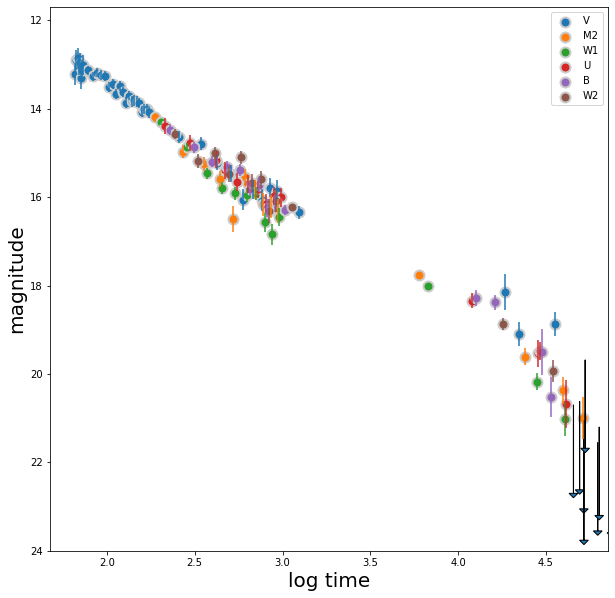

In [16]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)
    
#loop on every filter to plot - this will give differnt colors naturally. 
#Use pl.errorbar to plot the uncertainties

for f in data["filter"].unique():
    pl.errorbar(data.loc[data["filter"] == f, "logtime"], 
                data.loc[data["filter"] == f, "mag"], 
                yerr=data.loc[data["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)
    
# replot to add a better marker (optional)
for f in data["filter"].unique():
    pl.scatter(data.loc[data["filter"] == f, "logtime"], 
               data.loc[data["filter"] == f, "mag"], 
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')
    

# plot the upperlimits as arrows
nuplim = data.mag.isna().sum()
for i in data[data.upperlimit == 1].index:
    pl.arrow(data.loc[i].logtime, 
             data.loc[i].magerr, 0, 2, 
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)          
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

Figure 1: Photometry of the Afterglow of GRB 052505A. All photometry is from the Swift satellite and it is obtained from Table 3 of Blustin et al. 2005 https://arxiv.org/pdf/astro-ph/0507515.pdf. The photometric band for each datapoint is indicated in the legend. Time is relative from the estimated moment of explosion of the stellar progenitor. Upperlimits are indicated by down-pointing arrows.



N.B. le barre verticali in basso sono gli upeprlimit. Che normalmente non vengono utilizzati perchè sarebbe difficile trattarli.

###ADESSO BISOGNA PROCEDERE CON IL FIT. Cerco di scrivere il codice per $L_2$ e lo prendo dalle slides.

In [71]:
from scipy.optimize import minimize
def line(x, b, a):
    return a * x + b
	
def fitfunc(args, x, y):
    a, b = args
    return sum((y - line(a, b, x))**2)
	
x = data[data.upperlimit == 0].logtime.values
y = data.loc[data.upperlimit == 0].mag.values
	
initialGuess = (10, 1)
	
fitfunc(initialGuess, x, y)
l2Solution = minimize(fitfunc, initialGuess, args=(x, y))
print(fitfunc)
print("")
print("best fit parameters from the minimization of L2: " + 
       "slope {:.2f}, intercept {:.2f}".format(*l2Solution.x))

<function fitfunc at 0x7f21c0c7af80>

best fit parameters from the minimization of L2: slope 2.51, intercept 8.58


In [31]:
solution.x

array([2.51199977, 8.58266842])

###Adesso facciamo lo stesso fit usando $\chi^2$

In [36]:
from scipy.optimize import minimize
def line(x, b, a):
    return a * x + b
def chi2(args, x, y, s):
    a, b = args
    return sum((y - line(x, b, a))**2 / s**2)

x = data[data.upperlimit == 0].logtime.values
y = data.loc[data.upperlimit == 0].mag.values
s = data.loc[data.upperlimit == 0].magerr.values
initialGuess = (10, 1)

fitfunc(initialGuess, x, y)
solution = minimize(chi2, initialGuess, args=(x, y, s))
solution

chi2Solution = minimize(chi2, initialGuess, args=(x, y, s))
print(chi2Solution)
print("")
print("best fit parameters from the minimization of the chi squared: " + 
       "slope {:.2f}, intercept {:.2f}".format(*chi2Solution.x))

      fun: 317.42066980131
 hess_inv: array([[ 0.00020206, -0.000544  ],
       [-0.000544  ,  0.00156203]])
      jac: array([1.90734863e-05, 1.14440918e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 131
      nit: 6
     njev: 30
   status: 2
  success: False
        x: array([2.48019101, 8.59948749])

best fit parameters from the minimization of the chi squared: slope 2.48, intercept 8.60


###Adesso facciamo il fit usando sklearn

In [47]:
#note: imports should be moved to the top cell - follow PEP8 guidelines
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = np.c_[np.ones((len(data) - data.upperlimit.sum(), 1)), 
	data[data.upperlimit == 0].logtime]
y = data.loc[data.upperlimit == 0].mag.values

lr.fit(X, y)
print ("best fit parameters from the sklearn LinearRegression(): " + 
       "intercept {:.2f}, slope {:.2f}".format(lr.intercept_, lr.coef_[1]))

best fit parameters from the sklearn LinearRegression(): intercept 8.58, slope 2.51


###Adesso risolviamo invece la **normal equation**

In [65]:
#DI SEGUITO IL FIT DELLA PROF:

#creo le variabili esogene ed endogene
X = np.c_[np.ones((len(data) - data.upperlimit.sum(), 1)), 
	data[data.upperlimit == 0].logtime]
y = data.loc[data.upperlimit == 0].mag

#e fitto usando linalg:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print ("best fit parameters from the linlag(): " + 
      "intercept {:.2f}, slope {:.2f}".format(theta_best[0], theta_best[1]))

#per fittare ci basta fare linalg.inv perchè ci risolve il prodotto tra le 
#matrici, ovvero ci trova il vettore colonna (a b) che abbiamo nelle slide.

#UN ALTRO MODO DI FARE QUESTO PRINT È USARE L'ASTERISCO. VEDI QUI SOTTO:
print ("best fit parameters from the linlag(): " + 
      "intercept {:.2f}, slope {:.2f}".format(*theta_best))

#anzichè usare linalg, devo creare io il codice implementando la normal
#equation

best fit parameters from the linlag(): intercept 8.58, slope 2.51
best fit parameters from the linlag(): intercept 8.58, slope 2.51


La X della normal equation ha una colonna di 1 perchè la soluzione è per froza bidimensionale con questo modello. Infatti se guardiamo la normal equation, 
l'incognita x si becca il coefficiente **a**, mentre l'intercetta **b** non moltiplica niente, quindi abbiamo un 1.

In [64]:
X

array([[1.        , 1.81954394],
       [1.        , 1.8260748 ],
       [1.        , 1.83250891],
       [1.        , 1.83884909],
       [1.        , 1.84509804],
       [1.        , 1.85125835],
       [1.        , 1.8573325 ],
       [1.        , 1.86332286],
       [1.        , 1.8920946 ],
       [1.        , 1.91907809],
       [1.        , 1.94448267],
       [1.        , 1.96848295],
       [1.        , 1.99122608],
       [1.        , 2.01283722],
       [1.        , 2.03342376],
       [1.        , 2.05307844],
       [1.        , 2.07188201],
       [1.        , 2.08990511],
       [1.        , 2.10720997],
       [1.        , 2.12385164],
       [1.        , 2.13987909],
       [1.        , 2.15533604],
       [1.        , 2.17026172],
       [1.        , 2.18469143],
       [1.        , 2.19865709],
       [1.        , 2.2121876 ],
       [1.        , 2.22530928],
       [1.        , 2.2380461 ],
       [1.        , 2.27184161],
       [1.        , 2.30535137],
       [1.

In [ ]:
#when we use the chisq we are minimizing the likelihood of the function.

Gli **UPPERLIMIT** non sono utilizzati dal punto di vista statistico. Gli upperlimit provengono dall'apparato di misura e noi li rimuoviamo perchè utilizzarli sarebbe molto difficile. 



##DOCKSTRING

Quando scriviamo una funzione possiamo/dobbiamo inserire una dockstring che spieghi cosa fa la funzione, quali sono gli input e cosa ritorna. Per creare la dockstring, nella funzione inseriamo:

'''

QUI TUTTE LE SPIEGAZIONI

'''

Infatti quando facciamo "funzione?" quello che facciamo è invocare la dockstring scritta dall'autore della funzione.

##PLOT DI TUTTE LE SOLUZIONI

Create a function that uses the parameters you input and plots a line. Add a legend that describes which line corresponds to what.

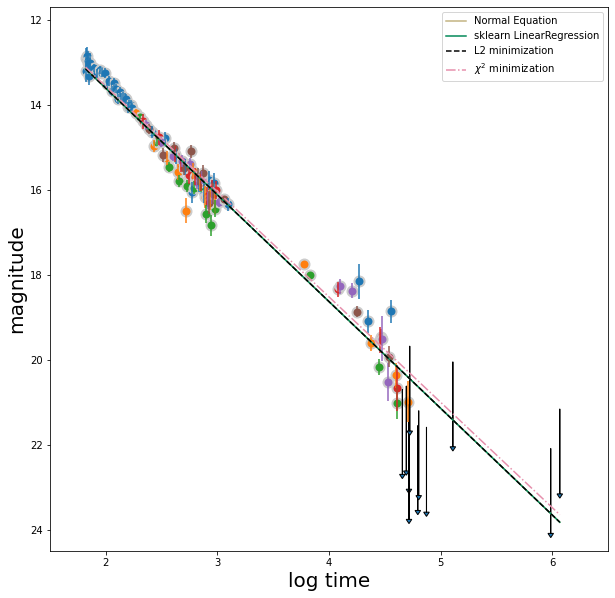

In [72]:
def plotline(pars, x, color='k', symbol='-', label='model', ax=ax):
    slope, intercept = pars
    y = line(x, intercept, slope)
    ax.plot(x, y, ls=symbol, c=color, label=label)


ax = pl.figure(figsize=(10,10)).add_subplot(111)

for f in data["filter"].unique():
    pl.errorbar(data.loc[data["filter"] == f, "logtime"], 
                data.loc[data["filter"] == f, "mag"], 
                yerr=data.loc[data["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)
    
# replot to add a better marker (optional)
for f in data["filter"].unique():
    pl.scatter(data.loc[data["filter"] == f, "logtime"], 
               data.loc[data["filter"] == f, "mag"], 
               alpha=1, s=100, linewidth=2,
               edgecolor='#cccccc', label=None)
    

# plot the upperlimits as arrows
nuplim = data.mag.isna().sum()
for i in data[data.upperlimit == 1].index:
    pl.arrow(data.loc[i].logtime, 
             data.loc[i].magerr, 0, 2, 
            head_width=0.05, head_length=0.1, ec='k')
    
#plotting models
#use Kelley colors for maximum readability
#https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
colors = ['C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379', 
          '604E97', 'F6A600', 'B3446C', 
          'DCD300', '882D17', '8DB600', '654522', 'E25822', '2B3D26',
          '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032', ]
#normal equation
plotline((lr.coef_[1], lr.intercept_), data.logtime.values, 
         color='#'+colors[0], 
         label="Normal Equation", ax=ax)
#sklearn
plotline((theta_best[::-1]), data.logtime,  
         color='#'+colors[2], symbol='-',
         label="sklearn LinearRegression", ax=ax)
#minimize L1
#plotline((l1Solution.x), data.logtime,  
#        symbol=':',
#       label="L1 minimization", ax=ax)

#minimize L2
plotline((l2Solution.x), data.logtime,  
         symbol='--',
         label="L2 minimization", ax=ax)
#minimize chi2
plotline((chi2Solution.x), data.logtime, 
         color='#'+colors[3], symbol='-.',
         label=r"$\chi^2$ minimization", ax=ax)

pl.legend()

#with the LinearRegression object I can also do
#pl.plot(grbAG.logtime, lr.predict(np.c_[np.ones((len(grbAG), 1)), grbAG.logtime]), 'k-')

pl.ylim(24.5,11.7)
pl.xlim(1.5, 6.5)
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

Figure 2: Same as Figure 1, but with linear regression models plotted. The models correspond to the best fit line to the data (excluding upper limits) calculated analytically by solving the normal equation, by solving the fit analysitcally with sklearn.LinearRegression(), and by minimizing the objective functions L1 and Chi squared. The models are indicated in the legend. Scrivere anche che sono in log-log scale. 


Nella caption avremmo dovuto anche scrivere che la $L_2$ ha una slope maggiore della $L_1$ perchè nella L2 diamo più importanza agli errori. I dati che hanno una luminosità minore hanno più incertezza perchè è più difficile la misura dallo sturmento. Quando inserisco gli errori quindi la slope del $\chi^2$ diminuisce perchè ho dato meno importanza ai punti che sono meno luminosi.



Colons can be used to align columns.

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned | $1600 |
| col 2 is      | centered      |   $12 |
| zebra stripes | are neat      |    $1 |

There must be at least 3 dashes separating each header cell.
The outer pipes (|) are optional, and you don't need to make the 
raw Markdown line up prettily. You can also use inline Markdown.

Markdown | Less | Pretty
--- | --- | ---
*Still* | `renders` | **nicely**
1 | 2 | 3

##INIZIAMO A PARLARE DEI MONTECARLO METHODS

Stiamo parlando di minimizzazione: stiamo ottimizzando L1 ed L2 e stiamo settando una target function e staimo cercando di ottmizzarla. Stiamo cercando i migliori parametri che mi ottimizzano la target function. 

What we did, especially in $\chi^2$, is MAXIMIZING the likelihood, changing the paraeter of the function.

Theroretically we are searching the minimum, but exerimentally this is very difficult. 

####**When we use the chisq, we are definig the likelihood of the model, i.e. the probability of the data given the model**

Maximizing the likelihood we seek the parameters that maximize the probability of the observed data under the chosen model.



IF I KNOW THE PROCESS, AND IF I KNOW HOW UNCERTANTIES ARE GENERATED, THAT MEANS THAT I CAN KNOW THE PROBAB OF GETTING A GIVEN VALUE FOR MODEL PARAMETERS. 
THE SAME WITH 1D DISTRUBTION (IN THE PAST), BUT NOW SIGMA AND MU CHANGE FOLLOWING THE EXOGENOUS VARIABLE. 

For every point in time I believe that there is a generative process that produces data at that point, following some known distribution, i.e. I know sigma and mu and depend on the point on axis. So I have a probability of what number I shold get for my data. 

**THE LIKELIHHOD** si the opposite: in this case I know the data and I am trying to find the probability of sigma and mu given the data. But the model is the same.

In the exercise we did optimization, so we were trying to find mu and sigma, believing that my generative process were a line. 
And the probability will be maximum when the model is right, because the probab is maximum with that mu and sigma. 


**Vedendo la forma dela likelihhod, la funzione cresce al crescere della funzione. Allora, siccome l'esponente è il $\chi^2$, quando la likelihood raggiunge il massimo, $\chi^2$ raggiunge il minimo.**

$\rightarrow$ Minimizing the $\chi^2$, means maximize the likelihood. 

###**GRADIENT DESCENT**

Take large step if derivative is large, and small step if derivative is small, to have computational efficience.

Sudo code (GRADIENT DESCENT algorithm)


1. Choose a target function Q(p) of the parameters p (for example $L_1$)
     
2. Choose a (random) initial value for the parameters: (e.g. p0 = (a0, b0))
     
3. Choose a learning rate η (this could be a multidimensional vector ηi setting a different learning rate for different features)

   **Repeat steps 4, 5, 6 until "convergence":**
     
4. Calculate the gradient Q' of the target function for the current parameter values calculating it over all observations in the training set
     
5. Calculate the next step sizes for each feature: **stepsize = Q'(p_now) * η**
     
6. Calculate the new parameters p_new as : p_new = p_now - stepsize


The problem that I may have a function with more minimum, with local minimum. **To avoid to get stuck in local minimum I add some stochasticity: "I am gonna take this step, even if the gradient is negative, with some probability".**

So I add the best size: what subset of data I am using to calculate gradint descent. 

So the difference when I add stochasticity is that I am taking the step even if the gradient is negative, and also that I calculate gradient in a subset of data, to get multiple solution. 

Since I am using such a subset, I can run the code in parallel and start from a different point, to improve cmoputational efficiency. 

# **LEZIONE 9 01042021**

In [ ]:
from sklearn.linear_model import LinearRegression
import scipy as sc
from scipy.optimize import minimize

In [ ]:
def line(intercept, slope, x):
    return slope * x + intercept
def l1(args, x, y):
    a, b = args
    return sum(np.abs(y - line(a, b, x)))


initialGuess = (10, 1)

l1Solution = minimize(l1, initialGuess, args=(x, y))
print(l1Solution)
print("")
print("best fit parameters from the minimization of L1: " + 
       "slope {:.2f}, intercept {:.2f}".format(*l1Solution.x))

      fun: 26.303319250460245
 hess_inv: array([[ 3.72424367e-04, -8.83687028e-05],
       [-8.83687028e-05,  2.09754501e-05]])
      jac: array([-0.25146294, -2.20956945])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 712
      nit: 20
     njev: 175
   status: 2
  success: False
        x: array([8.22524041, 2.64075474])

best fit parameters from the minimization of L1: slope 8.23, intercept 2.64


In [ ]:
def chi2(args, x, y, s):
    a, b = args
    return sum((y - line(a, b, x))**2 / s**2)

x = data[data.upperlimit == 0].logtime.values
y = data.loc[data.upperlimit == 0].mag.values
s = data.loc[data.upperlimit == 0].magerr.values

initialGuess = (10, 1)

chi2Solution = minimize(chi2, initialGuess, args=(x, y, s))
print(chi2Solution)
print("")
print("best fit parameters from the minimization of the chi squared: " + 
       "slope {:.2f}, intercept {:.2f}".format(*chi2Solution.x))

      fun: 317.4206698013084
 hess_inv: array([[ 4.23050895e-04, -1.33046572e-04],
       [-1.33046572e-04,  5.38581176e-05]])
      jac: array([0.00000000e+00, 1.90734863e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 258
      nit: 5
     njev: 62
   status: 2
  success: False
        x: array([8.59948748, 2.48019102])

best fit parameters from the minimization of the chi squared: slope 8.60, intercept 2.48


In [ ]:
!pip install emcee  #this is a package that can be pip installed

     |████████████████████████████████| 51kB 2.7MB/s 


In [ ]:
import emcee

In [ ]:
def log_prior(theta): #the prior should come frome knowledge that has nothing to do with data
  slope, intercept = theta
  if slope > 0 and intercept > 0:
    return 0
  return -np.inf

def log_likelihood(intercept, a, x, y, yerr):
  #assume a gaussian distirbution of uncertanties
  #remember a model is a line
  #the likelihood is a chi squared
  return -np.sum(((y - line(intercept, slope, x))**2) /yerr**2)

In [ ]:
def log_likelihood(theta, x, y, yerr):
    return - np.sum(((y - line(theta[0], theta[1], x)) ** 2 )/ yerr**2)

In [ ]:
def log_probability(theta, x, y, yerr):
  lp = log_prior(theta)
  if not np.isfinite(lp):
    return -np.inf
  
  return lp + log_likelihood(theta, x, y, yerr)

In [ ]:
#I want an initial guess
ig = [10,1]

In [ ]:
#initialize all walkers
nwalkers = 32
ndim = len(ig)
pos = np.array(ig) + 1e-4 * np.random.randn(nwalkers, ndim) #i wanna start w\ 32 walkers


In [ ]:
pos.shape

(32, 2)

In [ ]:
sampler = emcee.EnsembleSampler( nwalkers, ndim, log_probability, args=(x, y, s) )

|method 	                  |slope |	intercept|
| ------------- |:-------------:| -----:|
|Normal Equation 	          | 2.51 |  8.58     |
|sklearn.LinearRegression() | 2.51 |	8.58     |
|minimize L2 	              | 2.51 |	8.58     |
|minimize chi2 	            | 2.50 |	8.58     |

In [ ]:
sampler.run_mcmc(pos, 5000, progress = True)

100%|██████████| 5000/5000 [00:06<00:00, 723.91it/s]


State([[8.61327903 2.48224026]
 [8.60180427 2.47764799]
 [8.55953386 2.49422281]
 [8.61627915 2.47455604]
 [8.65434264 2.46114273]
 [8.5547897  2.4932335 ]
 [8.54535909 2.50445662]
 [8.62839496 2.46919042]
 [8.51351887 2.51059907]
 [8.58225567 2.47853855]
 [8.58934077 2.48163401]
 [8.63493503 2.46425337]
 [8.62528998 2.47578904]
 [8.51822828 2.50792841]
 [8.57232353 2.49068725]
 [8.60447848 2.48315385]
 [8.59346394 2.48088067]
 [8.64400687 2.46199881]
 [8.57067858 2.49151329]
 [8.58580466 2.48429381]
 [8.63429767 2.46103763]
 [8.58476726 2.48757255]
 [8.57572124 2.48386502]
 [8.64528148 2.46887937]
 [8.58341293 2.49120877]
 [8.59645085 2.48370416]
 [8.58993123 2.48501148]
 [8.65269525 2.46140228]
 [8.53397962 2.50144196]
 [8.6266848  2.46836145]
 [8.59381619 2.48384344]
 [8.6209278  2.47810655]], log_prob=[-319.34490805 -317.54194537 -317.93330347 -317.51294954 -318.38618786
 -318.31502867 -319.52195998 -317.72315031 -319.80016244 -319.84049985
 -317.62722567 -318.33504197 -318.4685675

In [ ]:
samples = sampler.get_chain()

In [ ]:
#if I wanna know the location taht is most common I can take the mean
#or the median of all of the chains

In [ ]:
flat_samples = samples.reshape(50000*32, 2)

ValueError: ignored

PER CONTINUARE QUESTO ESERCIZIO C'È UN COMMENTO SU SLACK DEL 
31/03 ALLE 16:12. 